In [24]:
import requests
import bs4
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import pandas as pd

In [25]:
url_inicial = 'https://books.toscrape.com/index.html'
url_root = 'https://books.toscrape.com/index.html'

In [26]:
r=requests.get(url_inicial)

In [27]:
r.status_code

200

In [28]:
r.headers

{'Server': 'nginx/1.17.7', 'Date': 'Fri, 07 Jan 2022 01:37:17 GMT', 'Content-Type': 'text/html', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'Last-Modified': 'Thu, 25 Mar 2021 13:59:05 GMT', 'Strict-Transport-Security': 'max-age=15724800; includeSubDomains', 'Content-Encoding': 'gzip'}

In [29]:
r.request.headers

{'User-Agent': 'python-requests/2.24.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [30]:
s = BeautifulSoup(r.text, 'lxml')

In [31]:
lista_article = s.find_all('article',class_='product_pod')
links_libros = [x.find('h3').find('a').get('href') for x in lista_article]
links_libros = [urljoin(url_root,i) for i in links_libros]
links_libros

['https://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html',
 'https://books.toscrape.com/catalogue/tipping-the-velvet_999/index.html',
 'https://books.toscrape.com/catalogue/soumission_998/index.html',
 'https://books.toscrape.com/catalogue/sharp-objects_997/index.html',
 'https://books.toscrape.com/catalogue/sapiens-a-brief-history-of-humankind_996/index.html',
 'https://books.toscrape.com/catalogue/the-requiem-red_995/index.html',
 'https://books.toscrape.com/catalogue/the-dirty-little-secrets-of-getting-your-dream-job_994/index.html',
 'https://books.toscrape.com/catalogue/the-coming-woman-a-novel-based-on-the-life-of-the-infamous-feminist-victoria-woodhull_993/index.html',
 'https://books.toscrape.com/catalogue/the-boys-in-the-boat-nine-americans-and-their-epic-quest-for-gold-at-the-1936-berlin-olympics_992/index.html',
 'https://books.toscrape.com/catalogue/the-black-maria_991/index.html',
 'https://books.toscrape.com/catalogue/starving-hearts-triangular-trade-tr

In [32]:
#Funcion para obtener links
def get_url_items(sopa,url):
    url_root = 'https://books.toscrape.com/index.html'
    lista_article = s.find_all('article',class_='product_pod')
    links_libros = [x.find('h3').find('a').get('href') for x in lista_article]
    links_libros = [urljoin(url_root,i) for i in links_libros]
    return links_libros

In [33]:
links_items = []
i = 0
while i < 50:
    i+=1
    print(f'Estoy en la pagina {url_inicial}')
    r_pag = requests.get(url_inicial)
    s_p = BeautifulSoup(r_pag.text,'lxml')
    links = get_url_items(s_p, url_inicial)
    next_a = s_p.select('li.next > a')
    if not next_a or not next_a[0].get('href'):
        break
    url_inicial = urljoin(url_inicial, next_a[0].get('href'))
    links_items.append(links)

Estoy en la pagina https://books.toscrape.com/index.html
Estoy en la pagina https://books.toscrape.com/catalogue/page-2.html
Estoy en la pagina https://books.toscrape.com/catalogue/page-3.html
Estoy en la pagina https://books.toscrape.com/catalogue/page-4.html
Estoy en la pagina https://books.toscrape.com/catalogue/page-5.html
Estoy en la pagina https://books.toscrape.com/catalogue/page-6.html
Estoy en la pagina https://books.toscrape.com/catalogue/page-7.html
Estoy en la pagina https://books.toscrape.com/catalogue/page-8.html
Estoy en la pagina https://books.toscrape.com/catalogue/page-9.html
Estoy en la pagina https://books.toscrape.com/catalogue/page-10.html
Estoy en la pagina https://books.toscrape.com/catalogue/page-11.html
Estoy en la pagina https://books.toscrape.com/catalogue/page-12.html
Estoy en la pagina https://books.toscrape.com/catalogue/page-13.html
Estoy en la pagina https://books.toscrape.com/catalogue/page-14.html
Estoy en la pagina https://books.toscrape.com/catalogu

In [34]:
list_scraper = []
for i in links_items:
    for j in i:
        list_scraper.append(j)
len(list_scraper)

980

In [35]:
uno = list_scraper[0]
r_item = requests.get(uno)
s_item = BeautifulSoup(r_item.text, 'lxml')

In [36]:
from IPython.display import Image

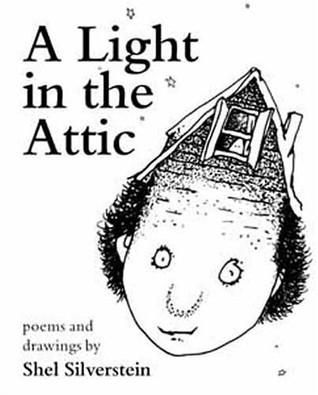

In [37]:
#Titulo del libro.
titulo = s_item.find('h1').get_text()
titulo
#Obtener precio
precio = s_item.find('p',class_ = 'price_color').get_text(strip = True)
precio
#Obtener la descripcion de  cada texto 
ancla_desc = s_item.find('div', id = 'product_description')
text_descripcion = ancla_desc.find_next_sibling('p').get_text(strip = True)
#Obtener imagen.
src_img = s_item.find('div',class_ = 'item active').find('img').get('src')
src_img = urljoin(url_root,src_img)
Image(requests.get(src_img).content)

In [38]:
#Funcion para iniciar el scraper de cada libro.
def scraper_book(url):
    content_book = {}
    r=requests.get(url)
    s_item = BeautifulSoup(r.text, 'lxml')
    #Titulo del libro
    titulo = s_item.find('h1').get_text(strip = True)
    if titulo:
        content_book['Titulo'] = titulo
    else :
        content_book['Titulo'] = None
    #Obtener precio
    precio = s_item.find('p',class_ = 'price_color').get_text(strip = True)
    if precio:
        content_book['Precio'] = precio
    else :
        content_book['Precio'] = None
    #Obtener la descripcion de producto
    ancla_desc = s_item.find('div', id = 'product_description')
    if ancla_desc:
        content_book['Descripcion' ]= ancla_desc.find_next_sibling('p').get_text(strip = True)
    else : 
        content_book['Descripcion'] = None
    #Obtener imagen
    src_img = s_item.find('div',class_ = 'item active').find('img').get('src')
    if src_img:
        content_book['Url_img'] = urljoin(url_root,src_img)
    else :
        content_book['Url_img'] = None
    return content_book

In [39]:
list_scraper = list_scraper[0:10]
datos_book = []
for idx, i in enumerate(list_scraper):
    print(f'estas scrapeando la pag {idx}')
    datos_book.append(scraper_book(i))

estas scrapeando la pag 0
estas scrapeando la pag 1
estas scrapeando la pag 2
estas scrapeando la pag 3
estas scrapeando la pag 4
estas scrapeando la pag 5
estas scrapeando la pag 6
estas scrapeando la pag 7
estas scrapeando la pag 8
estas scrapeando la pag 9


In [40]:
datos_book

[{'Titulo': 'A Light in the Attic',
  'Precio': 'Â£51.77',
  'Descripcion': "It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love th It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love that Silverstein. Need proof of his genius? RockabyeRockabye baby, in the treetopDon't you know a treetopIs no safe place to rock?And who put you up there,And your cradle, to

In [41]:
df_catalogo = pd.DataFrame(datos_book)
df_catalogo

,Titulo,Precio,Descripcion,Url_img
0,A Light in the Attic,Â£51.77,It's hard to imagine a world without A Light i...,https://books.toscrape.com/media/cache/fe/72/f...
1,Tipping the Velvet,Â£53.74,"""Erotic and absorbing...Written with starling ...",https://books.toscrape.com/media/cache/08/e9/0...
2,Soumission,Â£50.10,"Dans une France assez proche de la nÃ´tre, un ...",https://books.toscrape.com/media/cache/ee/cf/e...
3,Sharp Objects,Â£47.82,"WICKED above her hipbone, GIRL across her hear...",https://books.toscrape.com/media/cache/c0/59/c...
4,Sapiens: A Brief History of Humankind,Â£54.23,From a renowned historian comes a groundbreaki...,https://books.toscrape.com/media/cache/ce/5f/c...
5,The Requiem Red,Â£22.65,Patient Twenty-nine.A monster roams the halls ...,https://books.toscrape.com/media/cache/6b/07/6...
6,The Dirty Little Secrets of Getting Your Dream...,Â£33.34,Drawing on his extensive experience evaluating...,https://books.toscrape.com/media/cache/e1/1b/e...
7,The Coming Woman: A Novel Based on the Life of...,Â£17.93,"""If you have a heart, if you have a soul, Kare...",https://books.toscrape.com/media/cache/97/36/9...
8,The Boys in the Boat: Nine Americans and Their...,Â£22.60,For readers of Laura Hillenbrand's Seabiscuit ...,https://books.toscrape.com/media/cache/d1/2d/d...
9,The Black Maria,Â£52.15,"Praise for Aracelis Girmay:""[Girmay's] every l...",https://books.toscrape.com/media/cache/d1/7a/d...


In [49]:
from IPython.core.display import HTML

def path_html_img(url):
    return '<img src="'+ url + 'width = "30">'

In [50]:
df_catalogo['Vis_img'] = df_catalogo['Url_img'].apply(lambda x : path_html_img(x))
df_catalogo

,Titulo,Precio,Descripcion,Url_img,Vis_img
0,A Light in the Attic,Â£51.77,It's hard to imagine a world without A Light i...,https://books.toscrape.com/media/cache/fe/72/f...,"<img src=""https://books.toscrape.com/media/cac..."
1,Tipping the Velvet,Â£53.74,"""Erotic and absorbing...Written with starling ...",https://books.toscrape.com/media/cache/08/e9/0...,"<img src=""https://books.toscrape.com/media/cac..."
2,Soumission,Â£50.10,"Dans une France assez proche de la nÃ´tre, un ...",https://books.toscrape.com/media/cache/ee/cf/e...,"<img src=""https://books.toscrape.com/media/cac..."
3,Sharp Objects,Â£47.82,"WICKED above her hipbone, GIRL across her hear...",https://books.toscrape.com/media/cache/c0/59/c...,"<img src=""https://books.toscrape.com/media/cac..."
4,Sapiens: A Brief History of Humankind,Â£54.23,From a renowned historian comes a groundbreaki...,https://books.toscrape.com/media/cache/ce/5f/c...,"<img src=""https://books.toscrape.com/media/cac..."
5,The Requiem Red,Â£22.65,Patient Twenty-nine.A monster roams the halls ...,https://books.toscrape.com/media/cache/6b/07/6...,"<img src=""https://books.toscrape.com/media/cac..."
6,The Dirty Little Secrets of Getting Your Dream...,Â£33.34,Drawing on his extensive experience evaluating...,https://books.toscrape.com/media/cache/e1/1b/e...,"<img src=""https://books.toscrape.com/media/cac..."
7,The Coming Woman: A Novel Based on the Life of...,Â£17.93,"""If you have a heart, if you have a soul, Kare...",https://books.toscrape.com/media/cache/97/36/9...,"<img src=""https://books.toscrape.com/media/cac..."
8,The Boys in the Boat: Nine Americans and Their...,Â£22.60,For readers of Laura Hillenbrand's Seabiscuit ...,https://books.toscrape.com/media/cache/d1/2d/d...,"<img src=""https://books.toscrape.com/media/cac..."
9,The Black Maria,Â£52.15,"Praise for Aracelis Girmay:""[Girmay's] every l...",https://books.toscrape.com/media/cache/d1/7a/d...,"<img src=""https://books.toscrape.com/media/cac..."


In [51]:
df_catalogo.to_html(escape = False, formatters = dict(Portada = path_html_img))

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Titulo</th>\n      <th>Precio</th>\n      <th>Descripcion</th>\n      <th>Url_img</th>\n      <th>Vis_img</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>A Light in the Attic</td>\n      <td>Â£51.77</td>\n      <td>It\'s hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein\'s humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love th It\'s hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein\'s humorous and creative verse can amuse the dowdiest of re

In [52]:
HTML(df_catalogo.to_html(escape = False, formatters = dict(Portada = path_html_img)))

,Titulo,Precio,Descripcion,Url_img,Vis_img
0,A Light in the Attic,Â£51.77,"It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love th It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love that Silverstein. Need proof of his genius? RockabyeRockabye baby, in the treetopDon't you know a treetopIs no safe place to rock?And who put you up there,And your cradle, too?Baby, I think someone down here'sGot it in for you. Shel, you never sounded so good. ...more",https://books.toscrape.com/media/cache/fe/72/fe72f0532301ec28892ae79a629a293c.jpg,
1,Tipping the Velvet,Â£53.74,"""Erotic and absorbing...Written with starling power.""--""The New York Times Book Review "" Nan King, an oyster girl, is captivated by the music hall phenomenon Kitty Butler, a male impersonator extraordinaire treading the boards in Canterbury. Through a friend at the box office, Nan manages to visit all her shows and finally meet her heroine. Soon after, she becomes Kitty's ""Erotic and absorbing...Written with starling power.""--""The New York Times Book Review "" Nan King, an oyster girl, is captivated by the music hall phenomenon Kitty Butler, a male impersonator extraordinaire treading the boards in Canterbury. Through a friend at the box office, Nan manages to visit all her shows and finally meet her heroine. Soon after, she becomes Kitty's dresser and the two head for the bright lights of Leicester Square where they begin a glittering career as music-hall stars in an all-singing and dancing double act. At the same time, behind closed doors, they admit their attraction to each other and their affair begins. ...more",https://books.toscrape.com/media/cache/08/e9/08e94f3731d7d6b760dfbfbc02ca5c62.jpg,
2,Soumission,Â£50.10,"Dans une France assez proche de la nÃ´tre, un homme sâengage dans la carriÃ¨re universitaire. Peu motivÃ© par lâenseignement, il sâattend Ã une vie ennuyeuse mais calme, protÃ©gÃ©e des grands drames historiques. Cependant les forces en jeu dans le pays ont fissurÃ© le systÃ¨me politique jusquâÃ provoquer son effondrement. Cette implosion sans soubresauts, sans vraie rÃ©volution, s Dans une France assez proche de la nÃ´tre, un homme sâengage dans la carriÃ¨re universitaire. Peu motivÃ© par lâenseignement, il sâattend Ã une vie ennuyeuse mais calme, protÃ©gÃ©e des grands drames historiques. Cependant les forces en jeu dans le pays ont fissurÃ© le systÃ¨me politique jusquâÃ provoquer son effondrement. Cette implosion sans soubresauts, sans vraie rÃ©volution, se dÃ©veloppe comme un mauvais rÃªve.Le talent de lâauteur, sa force visionnaire nous entraÃ®nent sur un terrain ambigu et glissant ; son regard sur notre civilisation vieillissante fait coexister dans ce roman les intuitions poÃ©tiques, les effets comiques, une mÃ©lancolie fataliste.Ce livre est une saisissante fable politique et morale. ...more",https://books.toscrape.com/media/cache/ee/cf/eecfe998905e455df12064dba399c075.jpg,
3,Sharp Objects,Â£47.82,"WICKED above her hipbone, GIRL across her heart Words are like a road map to reporter Camille Preakerâs troubled past. Fresh from a brief stay at a psych hospital, Camilleâs first assignment from the second-rate daily paper where she works brings her reluctantly back to her hometown to cover the murders of two preteen girls. NASTY on her kneecap, BABYDOLL on her leg Since WICKED above her hipbone, GI